In [1]:
%matplotlib inline
%load_ext autotime

In [2]:
import  matplotlib.pylab as plt
import numpy as np
from  keras.models import Sequential 
from keras.utils import np_utils
from keras.datasets import mnist 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import adam
from keras.layers.normalization import BatchNormalization
from keras.applications.mobilenet import MobileNet


/Users/troy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


time: 1.9 s


In [61]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

time: 316 ms


In [62]:
x_train.shape

(60000, 28, 28)

time: 2.23 ms


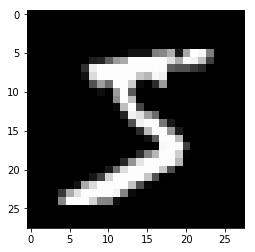

time: 102 ms


In [64]:
plt.imshow(x_train[0], cmap='gray')

In [71]:
height, width = (28,28)
x_train = x_train.reshape(x_train.shape[0], width, height, 1)
x_test = x_test.reshape(x_test.shape[0], width, height, 1)

time: 1.08 ms


In [7]:
x_train.shape

(60000, 28, 28, 1)

time: 2.38 ms


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

time: 2.21 ms


In [70]:
y_train = np_utils.to_categorical(y_train,10)
y_test  = np_utils.to_categorical(y_test, 10)

time: 3.55 ms


In [10]:
y_train.shape

(60000, 10)

time: 1.85 ms


In [11]:
#  Building the CNN
def build_model():
    model = Sequential()

    model.add(Conv2D(32, (3,3),  activation='relu',input_shape=(width,height,1)))
    model.add(Conv2D(32, (3,3),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization(scale=False, center=False))
    
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization(scale=False, center=False))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))

    return model


model = build_model()

time: 334 ms


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

time: 33.4 ms


In [13]:
model.fit(x_train, y_train, batch_size=128, epochs = 5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 96s 2ms/step - loss: 0.1440 - acc: 0.9547
Epoch 2/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0483 - acc: 0.9850
Epoch 3/5
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0362 - acc: 0.9885
Epoch 4/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0295 - acc: 0.9909
Epoch 5/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0239 - acc: 0.9922


time: 7min 53s


In [20]:
score = model.evaluate(x_test, y_test, verbose=1)
score

10000/10000 [==============================] - 4s 398us/step


[0.02290183251380513, 0.9941]

time: 3.98 s


### Calculate Kappa 

In [38]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix

y_test_hat = model.predict(x_test)
true_label = np.argmax(y_test, axis = 1)
pred_label = np.argmax(y_test_hat, axis=1)

kappa = cohen_kappa_score(y1=true_label, y2 = pred_label)
kappa 

0.9934417229051896

time: 3.6 s


In [39]:
confusion_matrix(true_label, pred_label)

array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1030,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  974,    0,    3,    0,    0,    5],
       [   0,    0,    0,    8,    0,  883,    1,    0,    0,    0],
       [   3,    1,    0,    0,    1,    1,  951,    0,    1,    0],
       [   0,   12,    5,    0,    0,    0,    0, 1009,    1,    1],
       [   0,    0,    1,    2,    0,    0,    0,    0,  970,    1],
       [   0,    0,    0,    0,    5,    2,    0,    1,    0, 1001]])

time: 10.9 ms


[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    0 1030    0    0    0    0    1    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  974    0    3    0    0    5]
 [   0    0    0    8    0  883    1    0    0    0]
 [   3    1    0    0    1    1  951    0    1    0]
 [   0   12    5    0    0    0    0 1009    1    1]
 [   0    0    1    2    0    0    0    0  970    1]
 [   0    0    0    0    5    2    0    1    0 1001]]


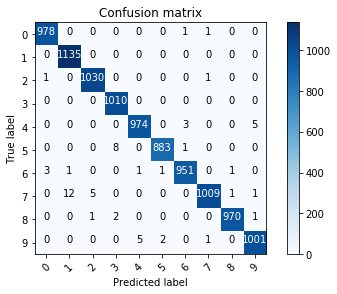

time: 398 ms


In [68]:
import utils
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
utils.plot_confusion_matrix(true_label, pred_label, class_names)

In [33]:
def my_kappa_score(y_test, y_test_hat):
    true_label = np.argmax(y_test, axis = 1)
    pred_label = np.argmax(y_test_hat, axis=1)
    p_observed = (true_label == pred_label).sum()/true_label.shape[0]
    p_expected = sum([(true_label == i).sum() * (pred_label == i).sum() / (true_label.shape[0] ** 2) for i in range(2)])
    kappa = (p_observed - p_expected) / (1 - p_expected)
    return kappa 

kappa = my_kappa_score(y_test_hat,)
kappa

0.9939632470200438

time: 5.02 ms


### Self-defined kappa  function has little differenct value from confusion_matrix(scilearn library), it is fine due to precision 

## save the trained model to the local

In [66]:
model.save(filepath='tained models/0_1_mymodel_5.h5',overwrite=True)

time: 285 ms


In [52]:

score = model.evaluate(x_test, y_test, verbose=0)
score

[0.02290183251380513, 0.9941]

time: 3.46 s


In [72]:
from keras.models import load_model
model = None 
model = load_model('tained models/0_1_mymodel_5.h5')
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.02290183251380513, 0.9941]

time: 6.01 s


### it works for loading a trained model from the saved file 